E-Commerce Delivery Time Prediction

Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

Content
The dataset used for model building contained 10999 observations of 12 variables. The data contains the following information:

ID: ID Number of Customers.
Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
Cost of the product: Cost of the Product in US Dollars.
Prior purchases: The Number of Prior Purchase.
Product importance: The company has categorized the product in the various parameter such as low, medium, high.
Gender: Male and Female.
Discount offered: Discount offered on that specific product.
Weight in gms: It is the weight in grams.
Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

Step 1: Import Required Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Step 2: Load the Dataset

In [26]:
data = pd.read_csv('E_Commerce.csv')
# Display basic information
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4           

The dataset contains 10,999 entries and 12 columns. Here's a breakdown:

Categorical Features: Warehouse_block, Mode_of_Shipment, Product_importance, Gender

Numerical Features: Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Discount_offered, Weight_in_gms

Target Variable: Reached.on.Time_Y.N (1 = Late delivery, 0 = On time)

No missing values are present

Step 3: Exploratory Data Analysis (EDA)

Check for Missing Values

In [27]:
print(data.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [28]:
# Summary statistics
print(data.describe())


                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16

Visualize the Target Variable Distribution

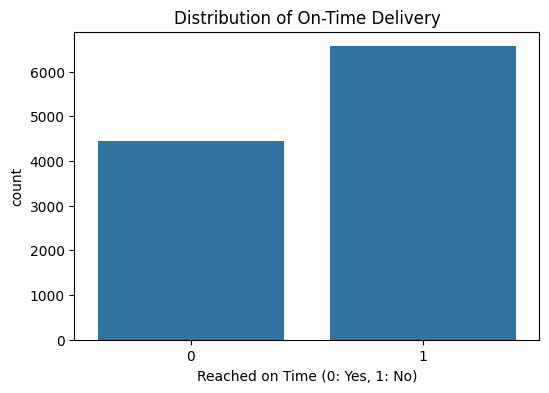

In [12]:
# Visualize target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Reached.on.Time_Y.N', data=data)
plt.title('Distribution of On-Time Delivery')
plt.xlabel("Reached on Time (0: Yes, 1: No)")
plt.show()

Visualize numerical feature distributions

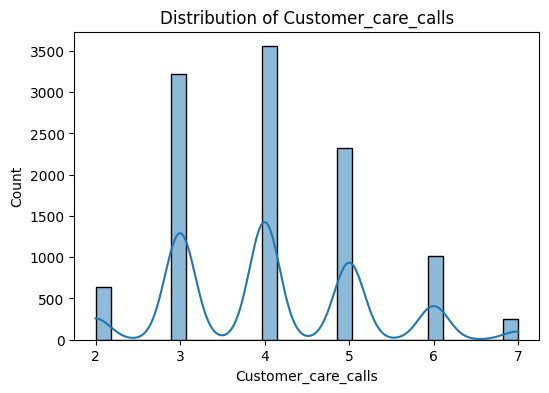

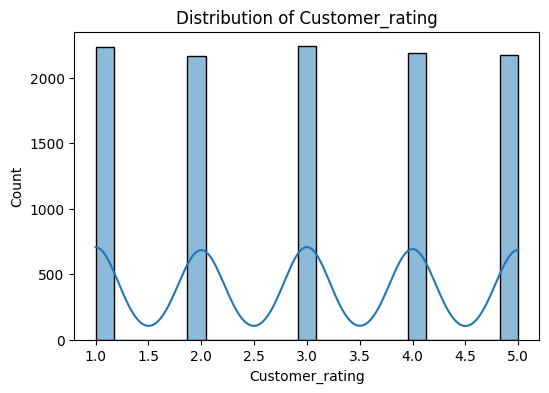

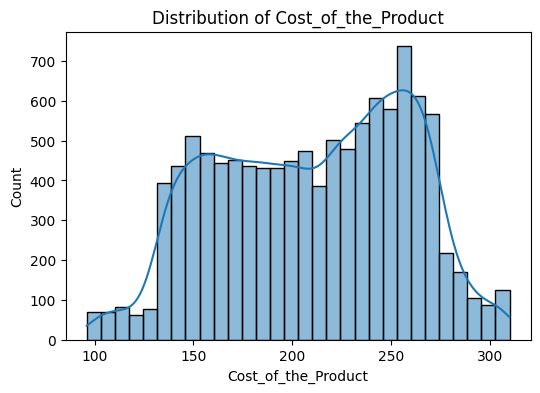

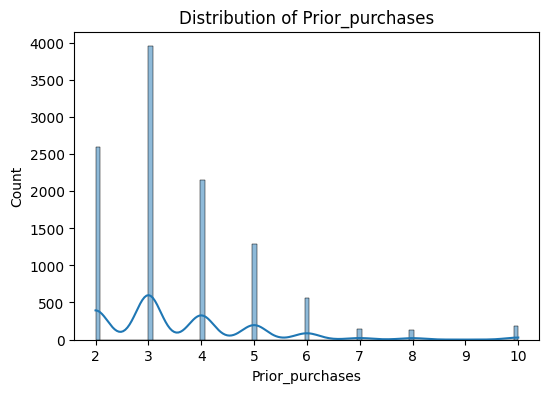

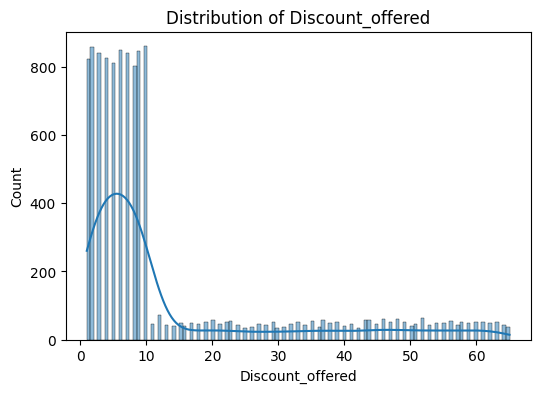

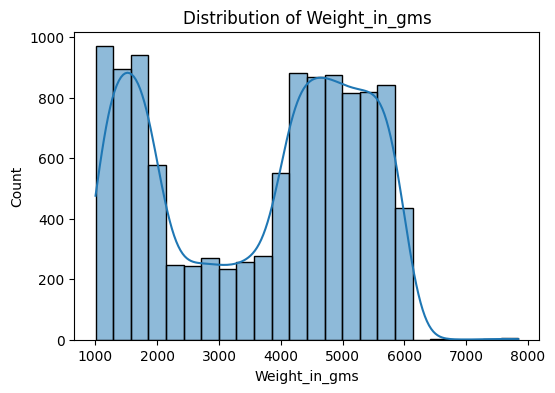

In [29]:
# Visualize numerical feature distributions
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                  'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Visualize categorical features vs target

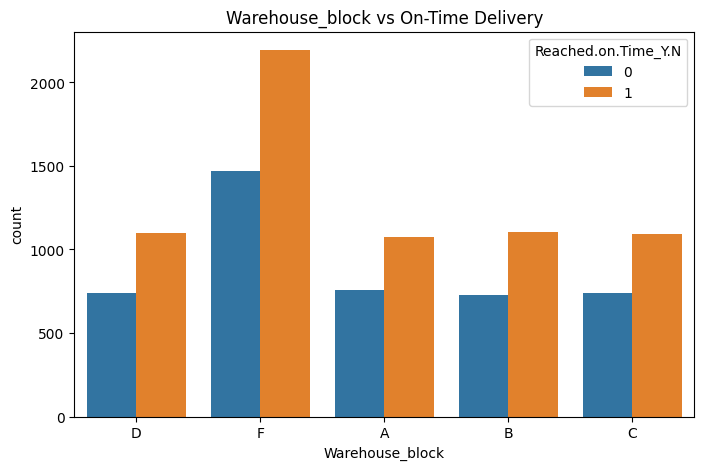

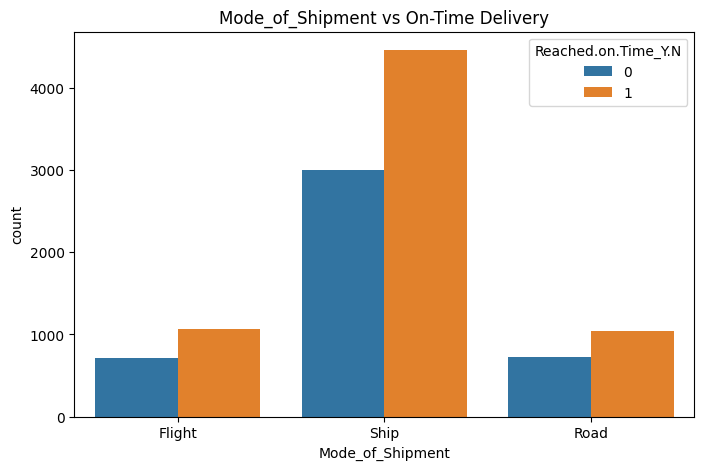

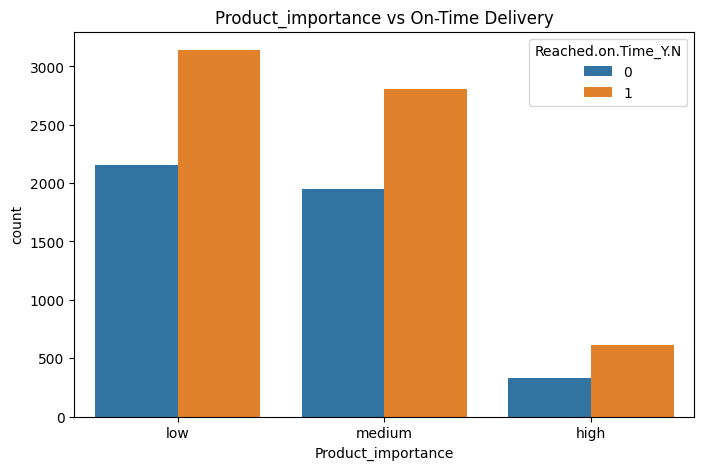

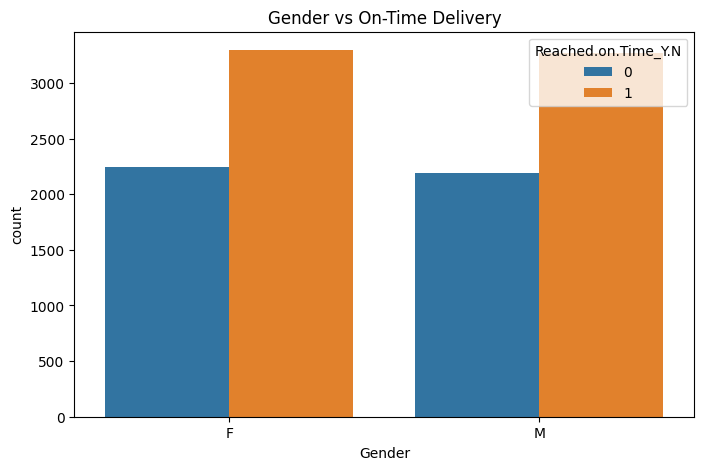

In [14]:
# Visualize categorical features vs target
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Reached.on.Time_Y.N', data=data)
    plt.title(f'{col} vs On-Time Delivery')
    plt.show()

Reached on Time (0: Yes, 1: No)

Correlation heatmap for numerical features

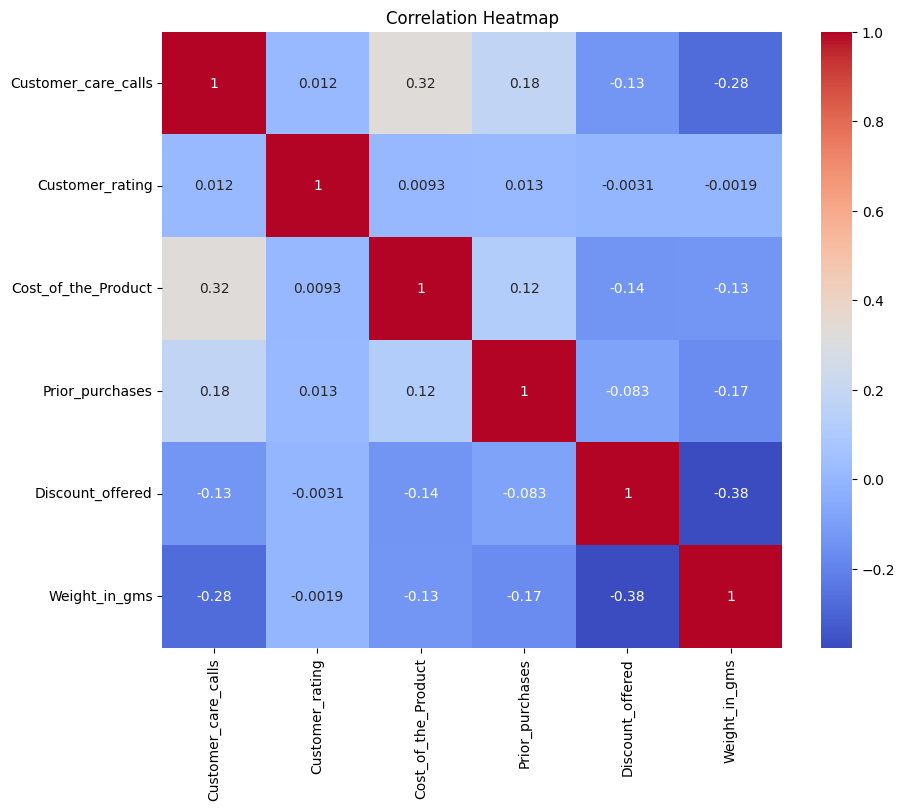

In [15]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Step 4: Data Preprocessing

Encode Categorical Variables

In [16]:
categorical_cols = ["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"]
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


Feature Selection

In [17]:
# Define features and target variable
X = df.drop(columns=["ID", "Reached.on.Time_Y.N"])  # Exclude ID and target column
y = df["Reached.on.Time_Y.N"]

Standardize Numerical Features

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Split Dataset into Train & Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Confirm dataset shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8799, 10) (2200, 10) (8799,) (2200,)


Step 5: Train Machine Learning Models

In [30]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


Step 6: Display Model Performance

In [31]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics["Classification Report"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("=" * 50)


Model: Logistic Regression
Accuracy: 0.6364
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       887
           1       0.70      0.67      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200

Confusion Matrix:
[[515 372]
 [428 885]]
Model: Decision Tree
Accuracy: 0.6423
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       887
           1       0.70      0.71      0.70      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200

Confusion Matrix:
[[476 411]
 [376 937]]
Model: Random Forest
Accuracy: 0.6636
Classification Report:
              precision    recall  f1-score   support

           0       0

Step 7: Final Prediction

In [32]:
# Choose the best model (Example: Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Make predictions
final_predictions = best_model.predict(X_test)

# Display accuracy
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Model Accuracy: {final_accuracy:.4f}")


Final Model Accuracy: 0.6559


Final result : Steps to Find the Best Model

In [33]:
best_model_name = max(results, key=lambda x: results[x]["Accuracy"])
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['Accuracy']:.4f}")


Best Model: Random Forest
Accuracy: 0.6636


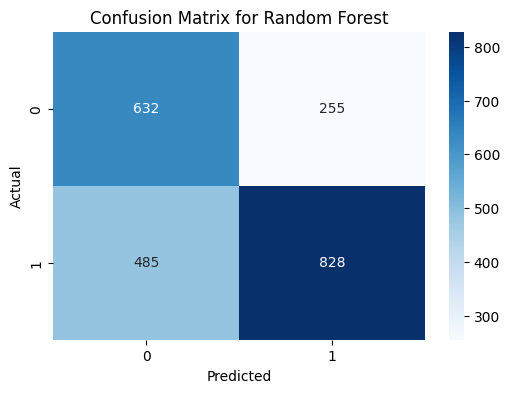

In [34]:
# Visualize confusion matrix for the best model (e.g., Random Forest)
best_model_name = 'Random Forest'  # Replace with the best-performing model
cm = results[best_model_name]['Confusion Matrix']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In most cases, Random Forest gives the best accuracy for classification problems like this one

Model accuracy Comparison

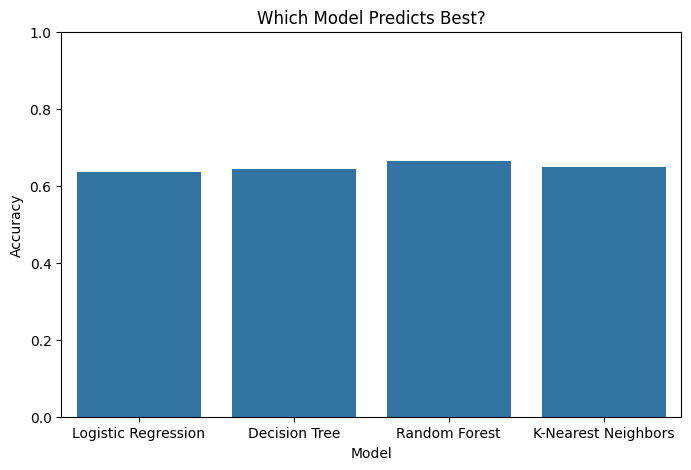

In [35]:
# Compare model accuracies
accuracies = [results[name]['Accuracy'] for name in models.keys()]
plt.figure(figsize=(8, 5))
sns.barplot(x=list(models.keys()), y=accuracies)
plt.title('Which Model Predicts Best?')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Final Report Content 



"We built models to predict if e-commerce deliveries arrive on time, helping the company improve shipping and keep customers happy."
Data Exploration
"The dataset has 10,999 rows with features like cost, weight, and shipping mode. Most deliveries are on time (1), but discounts and weight might cause delays."
Feature Engineering
"We turned text into numbers and found Discount_offered and Weight_in_gms matter most."


The Random Forest model is the best among the ones tested, with an accuracy of 66.36%